# Лабораторная работа №4

Проведение кластеризации над множеством

## **Задание**: кластеризация набора данных о покупках клиентов в супермаркете.

Вы владеете торговым центром в супермаркете, и через членские карты у вас есть некоторые основные данные о ваших клиентах, такие как идентификатор клиента, возраст, пол, годовой доход и оценка расходов. Вам необходимо понимание того, кого можно легко объединить, чтобы можно было передать указания маркетинговой команде и соответствующим образом спланировать стратегию проведения акций.

Необходимо провести исследование набора данных на то, по каким данным Вы будете проводить визуализацию и на оптимальное количество кластеров.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/3uoupxpfvhtr7wg/Mall_Customers.csv

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')
del df['CustomerID']

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
# Закодируем катгориальный признак Gender, 0 и 1
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

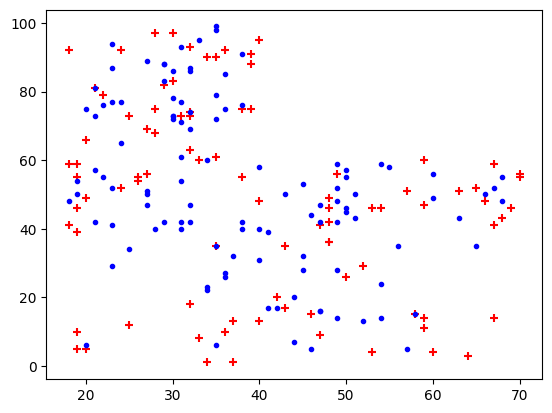

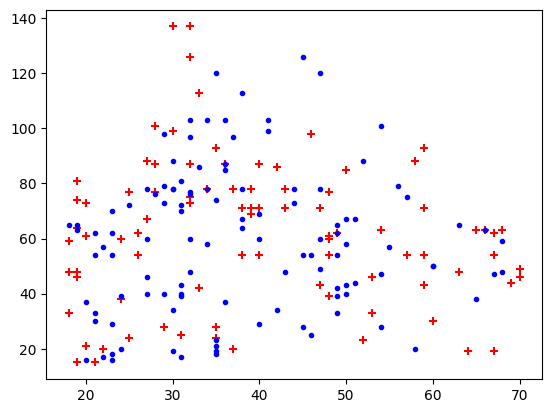

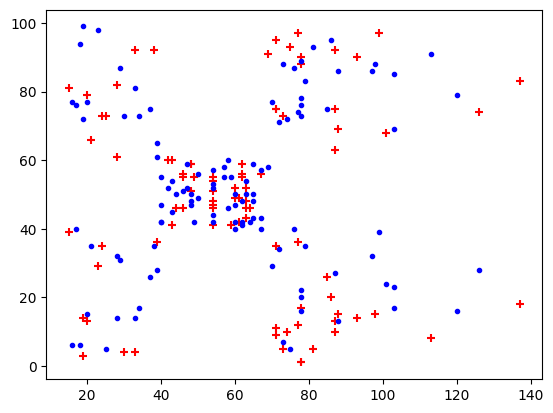

In [ ]:
# Построим диаграммы рассеяния всех пар признаков, кроме Gender
# Gender испиользуем как индикатор цвета точки
c1 = plt.scatter(df[df['Gender'] == 1]['Age'], df[df['Gender'] == 1]['Spending Score (1-100)'], c='r', marker='+')
c1 = plt.scatter(df[df['Gender'] == 0]['Age'], df[df['Gender'] == 0]['Spending Score (1-100)'], c='b', marker='.')
plt.show()

c2 = plt.scatter(df[df['Gender'] == 1]['Age'], df[df['Gender'] == 1]['Annual Income (k$)'], c='r', marker='+')
c2 = plt.scatter(df[df['Gender'] == 0]['Age'], df[df['Gender'] == 0]['Annual Income (k$)'], c='b', marker='.')
plt.show()

c3 = plt.scatter(df[df['Gender'] == 1]['Annual Income (k$)'], df[df['Gender'] == 1]['Spending Score (1-100)'], c='r', marker='+')
c3 = plt.scatter(df[df['Gender'] == 0]['Annual Income (k$)'], df[df['Gender'] == 0]['Spending Score (1-100)'], c='b', marker='.')
plt.show()

Из последнего графика видно, что клиентоы хорошо делятся на 5 категрий поведения. Есть те кто мало зарабатывает, а тратит либо малую либо большую часть своих доходов. Аналогичто с тебе кто много зарабатывет. И есть тек кто зарабатывает средне, но и тратить около половины своих доходов. Причем распределение полов примерно одинаквое для каждого кластера. Попробуем разбить на кластеры по этим двум признакам.

In [ ]:
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Созадим обучем модель KMeans, для 5 класстеров
model = KMeans(n_clusters=5)
model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
pred = model.predict(df)
print(pred)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 0 3 2 3 2 3 0 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]


Теперь попробуем оценить насколько разбиение на 5 класстеров лучше других вариантов. Применим методы локтя и силуетов.

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score
scores= []
res_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    model = KMeans(n_clusters=i, random_state=0).fit(df)
    preds = model.predict(df)

    print("Score for number of cluster(s) {}: {}".format(i,model.score(df)))
    scores.append(-model.score(df))

    silhouette = silhouette_score(df,preds)
    res_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score for number of cluster(s) 2: -181363.59595959593
Silhouette score for number of cluster(s) 2: 0.2968969162503008
Score for number of cluster(s) 3: -106348.37306211123
Silhouette score for number of cluster(s) 3: 0.46761358158775435
Score for number of cluster(s) 4: -73679.78903948836
Silhouette score for number of cluster(s) 4: 0.4931963109249047
Score for number of cluster(s) 5: -44448.45544793371
Silhouette score for number of cluster(s) 5: 0.553931997444648
Score for number of cluster(s) 6: -37265.86520484347
Silhouette score for number of cluster(s) 6: 0.5379675585622219
Score for number of cluster(s) 7: -30259.65720728547
Silhouette score for number of cluster(s) 7: 0.5264283703685728
Score for number of cluster(s) 8: -25095.703209997562
Silhouette score for number of cluster(s) 8: 0.45704384633565154
Score for number of cluster(s) 9: -21830.041978049434
Silhouette score for number of cluster(s) 9: 0.4563032021725485


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Score for number of cluster(s) 10: -20736.679938924128
Silhouette score for number of cluster(s) 10: 0.4492169169017592
Score for number of cluster(s) 11: -17702.595932296277
Silhouette score for number of cluster(s) 11: 0.437104484577306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


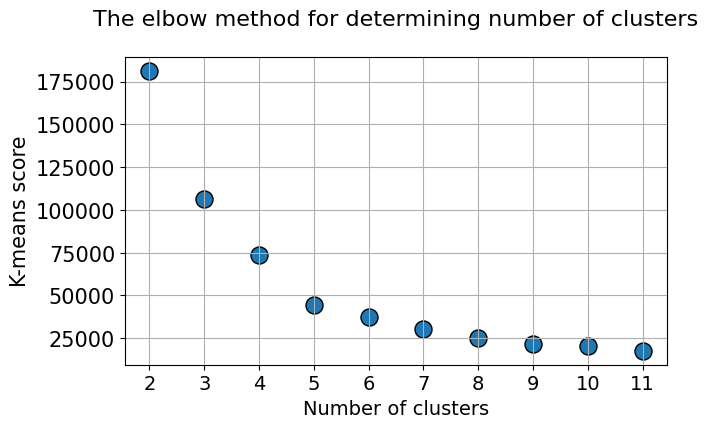

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

На графики изгиб досаточно плавный и поэтому метод локтя не дает совершенной ясности какое разбиение лучше 5 или 6.

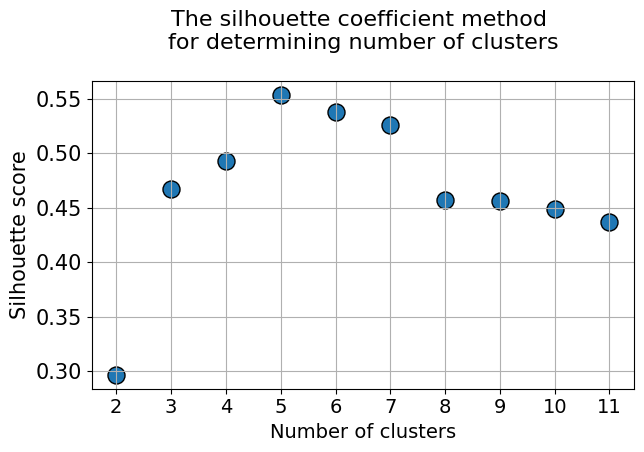

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=res_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Для метода силуета ясности больше. Тут хоть и с небольшим отрывом, но 5 кластеров дают лучшую оценку.

Посмотрим как с этой задачей справиться DBSCAN

In [ ]:
# Создаем и обучаем модель
dbscan = DBSCAN(eps=8, min_samples = 6)
dbscan.fit(df)

DBSCAN(eps=8, min_samples=6)

In [ ]:
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
pca_2d = np.array(df)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4])

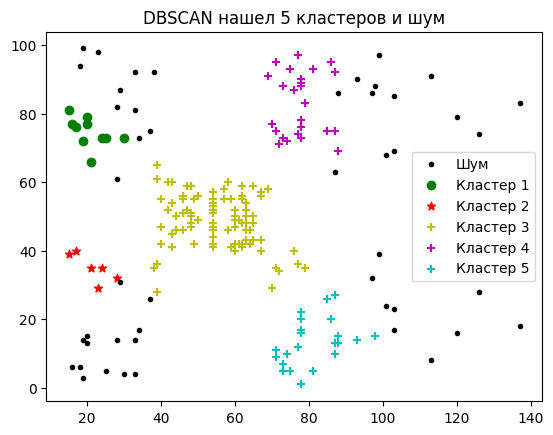

In [ ]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        a1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='k', marker='.')
    elif dbscan.labels_[i] == 0:
        a2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        a3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='*')
    elif dbscan.labels_[i] == 2:
        a4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='+')
    elif dbscan.labels_[i] == 3:
        a5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='m', marker='+')
    elif dbscan.labels_[i] == 4:
        a6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='c', marker='+')
plt.legend([a1, a2, a3, a4, a5, a6], ['Шум', 'Кластер 1', 'Кластер 2', 'Кластер 3', 'Кластер 4', 'Кластер 5'])
plt.title('DBSCAN нашел 5 кластеров и шум')
plt.show()

Видно что для данных параметров DBSCAN довольно точно пределил 5 класстеров с незначительным уровнем шума - значений которые он не смог отнести ни к одному из кластеров, так как они слишком разрежены.